In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="white", color_codes=True)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [46]:
dataset = pd.read_csv('drive/My Drive/Colab Notebooks/ICP6/CC.csv')
dataset.drop(["CREDIT_LIMIT"], axis= 1, inplace = True) 
x = dataset.iloc[:,1:16]
print(dataset["TENURE"].value_counts())


12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


In [47]:
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
print(nulls)



                                  Null Count
MINIMUM_PAYMENTS                         313
PRC_FULL_PAYMENT                           0
PAYMENTS                                   0
PURCHASES_TRX                              0
CASH_ADVANCE_TRX                           0
CASH_ADVANCE_FREQUENCY                     0
PURCHASES_INSTALLMENTS_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_FREQUENCY                        0
CASH_ADVANCE                               0
INSTALLMENTS_PURCHASES                     0
ONEOFF_PURCHASES                           0
PURCHASES                                  0
BALANCE_FREQUENCY                          0
BALANCE                                    0


In [0]:
x["MINIMUM_PAYMENTS"].fillna(x["MINIMUM_PAYMENTS"].mean(),inplace= True)


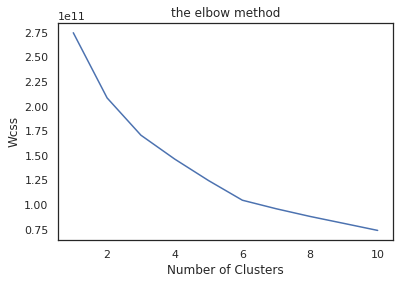

In [50]:
wcss= [] 
for i in range(1,11):
  kmeans= KMeans(n_clusters=i,max_iter=300,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [52]:
from sklearn.cluster import KMeans
nclusters = 6 
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5175400674258289


In [53]:

from sklearn.preprocessing import StandardScaler 
x.head() 
  
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
nclusters = 6 
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5175400674258289
